# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="Lightgrey"><h1>TITANIC SURVIVAL PROJECT</h1></font></div>

# <font color="lightgrey">Project Description</font>

The Titanic dataset is a classic dataset used for predicting the survival of passengers on the Titanic ship based on various features. The goal is to build a machine learning model that can predict whether an arbitrary passenger would survive the sinking or not based on attributes such as passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare, cabin, and the port of embarkation.

# <font color='Lightgrey'>Key Points:</font>

- Data Collection
- Data Exploration
- Data Visualization
- Data Processing
- Machine Learning
 >- Model Building
 >- Model Evaluation
 >- Hyperparameter Tuning
 >- Prediction
- Conclusion

## <font color='Lightgrey'>1.Data Collection</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [5]:
data_copy = data.copy()
data_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## <font color="Lightgrey">2.Data Exploration</font>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

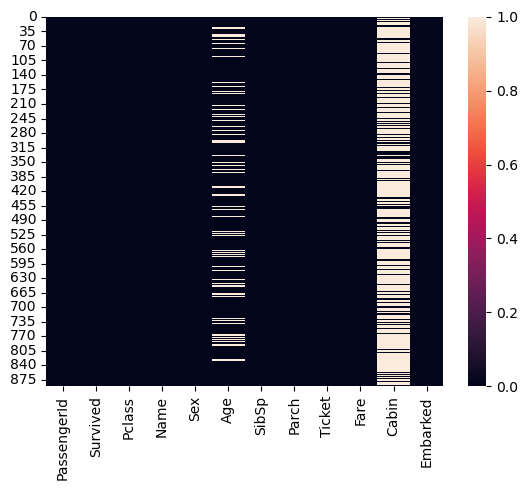

In [10]:
sns.heatmap(data.isnull())

In [11]:
data.isin([' ','?','-','null','NA']).sum().any()

False

In [12]:
data.duplicated().sum()

0

In [13]:
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


0    549
1    342
Name: Survived, dtype: int64


3    491
1    216
2    184
Name: Pclass, dtype: int64


Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length

In [14]:
data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [15]:
data.nunique().to_frame('Number of Unique values in the Dataset:')

,Number of Unique values in the Dataset:
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


From the above analysis we can say:

>- The dataset contains 891 rows and 12 columns. 
>- The dataset has 3 data types: int64, float64, and object.
>- Missing values: There are missing values in the "Age," "Cabin," and "Embarked" columns.
>- No duplicate columns are present.
>- No white spaces are present in the column names.

We will address the missing values in later part.

In [16]:
data.drop(columns=['Cabin'],inplace = True)

Cabin is an unnecessary column and has missing values too so we droped if for better evaluation.

## <font color='Lightgrey'>3.Data Visulization</font>

#### Let's get into few interesting insights of the data.
 >- How many Survived?
 >- Factors affecting Survival .

###  How many survived?

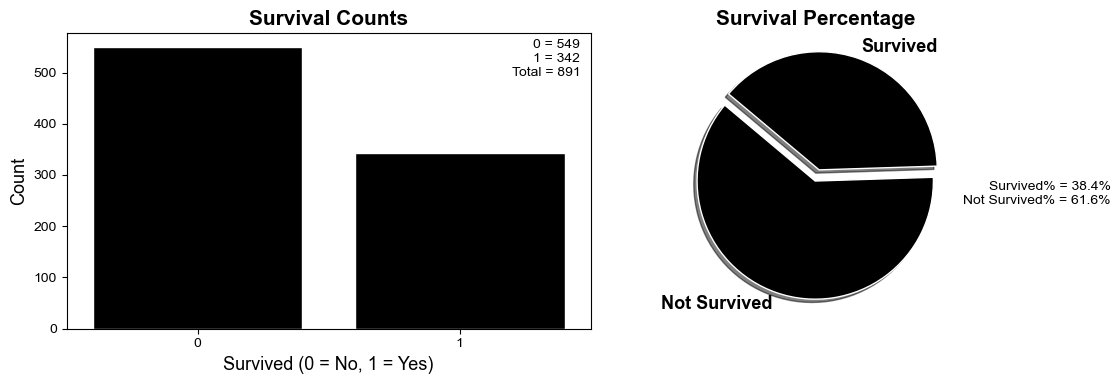

In [17]:
survival_counts = data['Survived'].value_counts()
survival_percentage = survival_counts / survival_counts.sum() * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# visualize survival counts
sns.set(style="whitegrid")
sns.barplot(x=survival_counts.index, y=survival_counts.values, color='black', ax=ax1)
ax1.set_title("Survival Counts", fontsize=15, fontweight='bold')
ax1.set_xlabel("Survived (0 = No, 1 = Yes)", fontsize=13)
ax1.set_ylabel("Count", fontsize=13)

# label
total_count = len(data)
count_labels = f"0 = {survival_counts[0]}\n1 = {survival_counts[1]}\nTotal = {total_count}"
ax1.text(0.98, 0.98, count_labels, transform=ax1.transAxes, ha='right', va='top', fontsize=10, color='black')

# visualize survival percentages
labels = ['Not Survived', 'Survived']
explode = [0, 0.1]
colors = ['#000000', '#000000']  
ax2.pie(survival_percentage, labels=labels, explode=explode, autopct='%2.1f%%', startangle=140,
        textprops={'fontsize': 13, 'fontweight': 'bold', 'color': 'black'}, shadow=True, colors=colors)
ax2.set_title("Survival Percentage", fontsize=15, fontweight='bold')

#label
percentage_label = f"Survived% = {survival_percentage[1]:.1f}%\nNot Survived% = {survival_percentage[0]:.1f}%"
ax2.text(1.5, 0.5, percentage_label, transform=ax2.transAxes, ha='right', va='top', fontsize=10, color='black')

plt.tight_layout()
plt.show()

___This observation provides a concise and informative summary of the survival rates on the Titanic, emphasizing the tragic outcome of the accident.___

> The data clearly shows that the majority of passengers did not survive the Titanic accident.

> Out of the 891 passengers on board, only approximately 342 passengers survived, which accounts for just 38.4% of the total passengers. This highlights the high fatality rate of the disaster.


### Factors affecting survival.

In [18]:
survival_counts = data.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
survival_counts['Total'] = survival_counts[0] + survival_counts[1]
survival_counts['Survival Percentage'] = (survival_counts[1] / survival_counts['Total']) * 100
print(survival_counts)

Survived    0    1  Total  Survival Percentage
Sex                                           
female     81  233    314            74.203822
male      468  109    577            18.890815


#### __We can conclude that female passengers were given more priority for rescue. Here's explaination:-__
> 1. The ship had a larger number of male passengers than female passengers.
> 2. Despite the gender imbalance, women had a significantly higher survival rate of around 74%, while men had a much lower 
     survival rate of about 18-19%.
> 3. As a result, the number of women who survived was nearly twice the number of men who survived, highlighting a substantial        disparity in survival based on gender

In [19]:
print('The Oldest Passenger on the ship was of',data['Age'].max(),'Years')
print('The Youngest Passenger on the ship was of',data['Age'].min(),'Years')
print('Average Age on the ship was',data['Age'].mean(),'Years')

The Oldest Passenger on the ship was of 80.0 Years
The Youngest Passenger on the ship was of 0.42 Years
Average Age on the ship was 29.69911764705882 Years


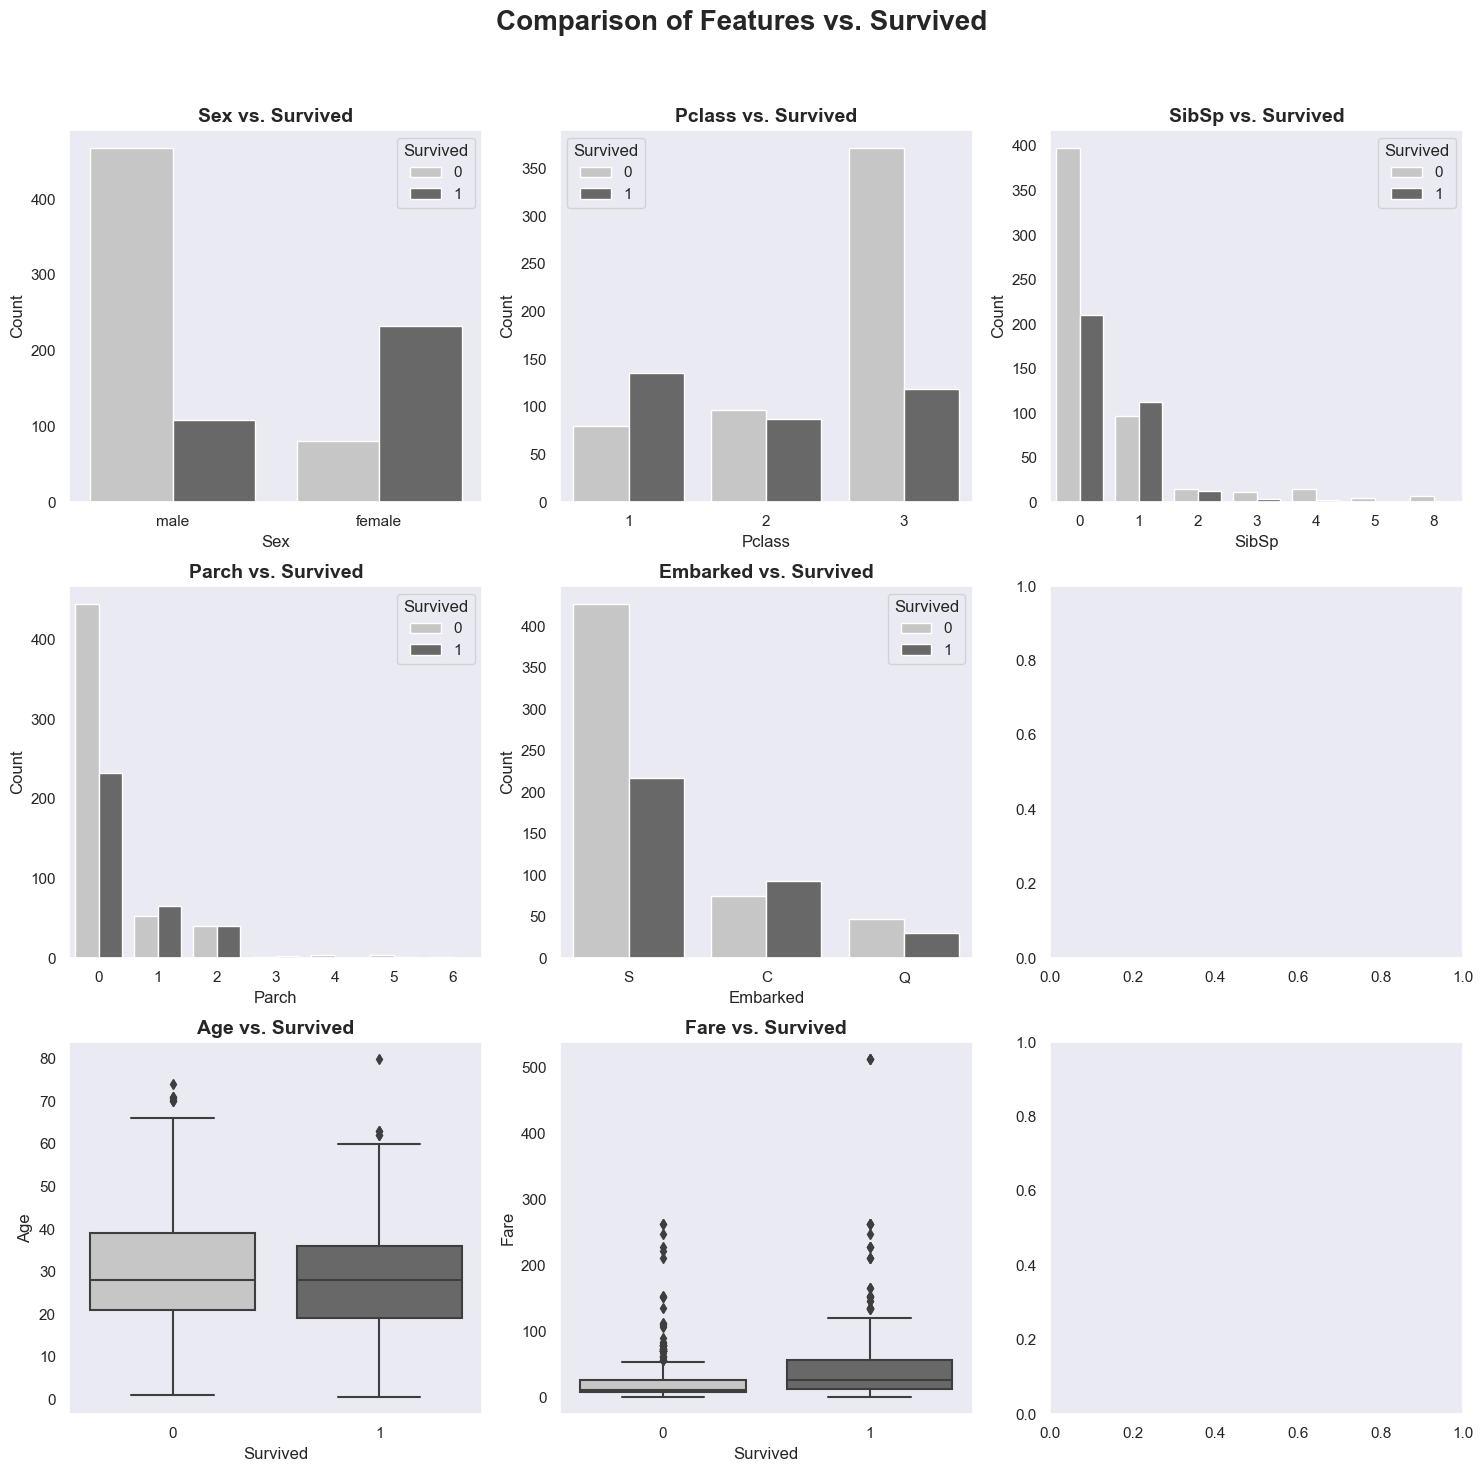

In [20]:
sns.set_style("dark")

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Comparison of Features vs. Survived', fontsize=20, fontweight='bold')

# Categorical features
categorical_features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Ticket']

for i, feature in enumerate(categorical_features):
    if i < 5:
        sns.countplot(x=feature, hue='Survived', data=data, ax=axes[i // 3, i % 3], palette='Greys')
        axes[i // 3, i % 3].set_title(f'{feature} vs. Survived', fontsize=14, fontweight='bold')
        axes[i // 3, i % 3].set_xlabel(feature, fontsize=12)
        axes[i // 3, i % 3].set_ylabel('Count', fontsize=12)

# Numeric features (box plots)
numeric_features = ['Age', 'Fare']

for i, feature in enumerate(numeric_features):
    sns.boxplot(x='Survived', y=feature, data=data, ax=axes[2, i], palette='Greys')
    axes[2, i].set_title(f'{feature} vs. Survived', fontsize=14, fontweight='bold')
    axes[2, i].set_xlabel('Survived', fontsize=12)
    axes[2, i].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

C:\Users\Mahima\AppData\Local\Temp\ipykernel_10060\2027175925.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_survived = data.corr()['Survived'].drop('Survived').to_frame()  # Convert Series to DataFrame


Correlation of features with 'Survived':
             Survived
PassengerId -0.005007
Pclass      -0.338481
Age         -0.077221
SibSp       -0.035322
Parch        0.081629
Fare         0.257307


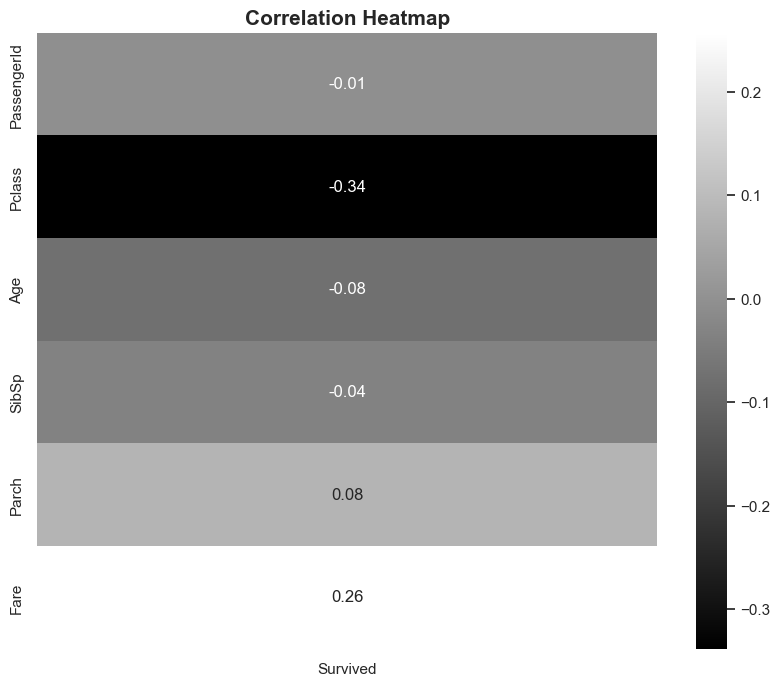

In [21]:
correlation_with_survived = data.corr()['Survived'].drop('Survived').to_frame()  # Convert Series to DataFrame
print("Correlation of features with 'Survived':")
print(correlation_with_survived)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_survived, annot=True, cmap='gray', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=15, fontweight='bold')
plt.show()

__These observations provide insights into the relationships between different features and the likelihood of survival on the Titanic.__

1. Pclass (-0.338481):
>- Observation: There is a negative correlation between passenger class and survival.
>- Explanation: As the passenger class number increases (from 1st class to 3rd class), the likelihood of survival decreases.        Lower class passengers were less likely to survive.

2. Age (-0.077221):
>- Observation: Age has a weak negative correlation with survival.
>- Explanation: Younger passengers have a slightly better chance of survival, but the correlation is not very strong.

3. SibSp (-0.035322):
>- Observation: The number of siblings or spouses on board has a weak negative correlation with survival.
>- Explanation: Passengers with fewer siblings or spouses aboard were slightly more likely to survive.

4. Parch (0.081629):
>- Observation: The number of parents or children on board has a weak positive correlation with survival.
>- Explanation: Passengers with more parents or children aboard had a slightly better chance of survival.

5. Fare (0.257307):
>- Observation: Fare has a moderate positive correlation with survival.
>- Explanation: Passengers who paid higher fares had a better chance of survival. This suggests that those in higher passenger      classes with more expensive tickets had a higher likelihood of surviving.

## <font color="Lightgrey">4.Data Prossesing</font>

In [22]:
median_age = data['Age'].median()
data['Age'].fillna(median_age, inplace=True)

most_common_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_common_embarked, inplace=True)

missing_values = data.isnull().sum()
print("Missing values after handling:")
print(missing_values)

Missing values after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [23]:
# Droping unnecessary column for further investigation
data.drop(["PassengerId", "Name" , "Ticket" ],axis=1,inplace=True)

In [24]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Survived', 'Pclass', 'SibSp', 'Parch'], float64: ['Age', 'Fare'], object: ['Sex', 'Embarked']}

In [25]:
Numerical_features= ['Survived', 'Pclass', 'SibSp', 'Parch','Age', 'Fare']
Categorical_features = ['Sex', 'Embarked']

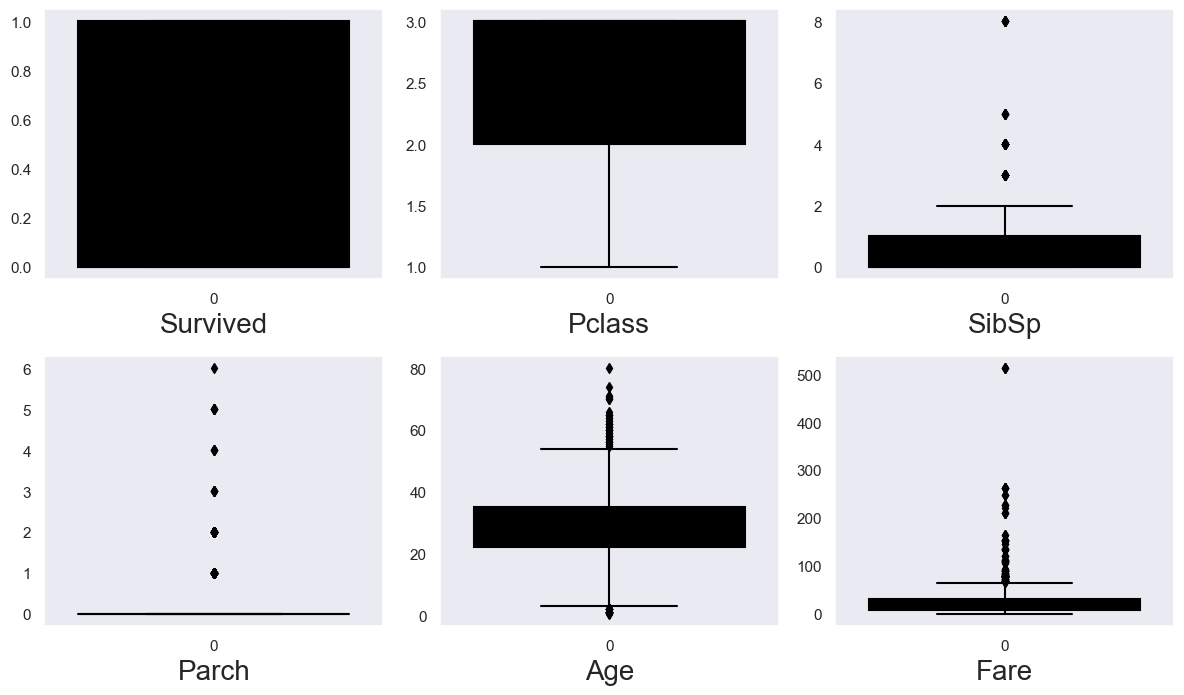

In [26]:
# Identifying the outliers using boxplot in train dataset
plt.figure(figsize=(12,10),facecolor='white')
plotnumber=1
for i in Numerical_features:
    if plotnumber<=10:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[i],color='black')
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
from collections import Counter  

def detect_outliers(data, n, features):
    
    outlier_indices = []

    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(data[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(data[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR

        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)
    multiple_outliers = [k for k, v in outlier_indices.items() if v > n]

    return multiple_outliers

In [28]:
from collections import Counter

outlier_columns = ["Age", "SibSp", "Parch", "Fare"]
outliers_to_drop = detect_outliers(data, 2, outlier_columns)

In [29]:
data = data.drop(outliers_to_drop, axis = 0).reset_index(drop=True)

In [30]:
data.shape

(866, 8)

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Categorical_features:
    data[i] = le.fit_transform(data[i])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


## <font color = 'Lightgrey'> 5.Machine Learning</fonts>

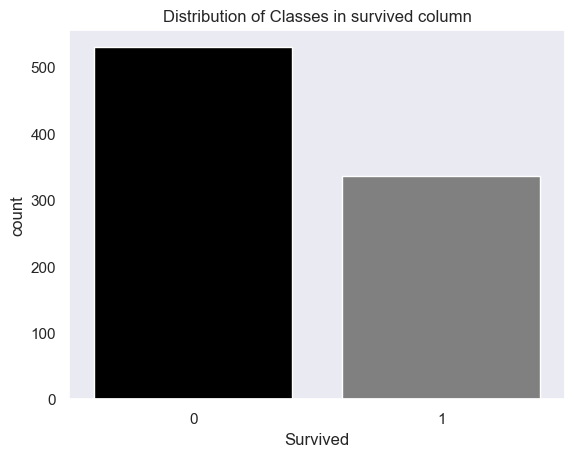

In [32]:
custom_palette = ["black", "grey"]
sns.set_palette(custom_palette)

sns.countplot(x='Survived', data=data)
plt.title('Distribution of Classes in survived column')
plt.show()

In [33]:
X = data.drop(['Survived'], axis =1)
Y = data['Survived']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [35]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=67, test_size=.25)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (649, 7)
Training target vector size: (649,)
Test feature matrix size: (217, 7)
Test target vector size: (217,)


In [37]:
maxAccu = 0
maxRS = 0

for i in range(50, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=i)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, Y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print('Best accuracy is', maxAccu, 'on Random_state', maxRS)

Best accuracy is 0.8461538461538461 on Random_state 121


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=121)

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier()
}

results_list = []

for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    acc = accuracy_score(Y_test, Y_pred)
    prec = precision_score(Y_test, Y_pred)
    rec = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    
    model_results = pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [acc],
        "Precision": [prec],
        "Recall": [rec],
        "F1-Score": [f1]
    })
    
    results_list.append(model_results)

results = pd.concat(results_list, ignore_index=True)
print(results)

                       Model  Accuracy  Precision    Recall  F1-Score
0        Logistic Regression  0.846154   0.860000  0.767857  0.811321
1              Decision Tree  0.761538   0.750000  0.669643  0.707547
2              Random Forest  0.819231   0.803738  0.767857  0.785388
3  Support Vector Classifier  0.842308   0.890110  0.723214  0.798030
4        K-Nearest Neighbors  0.815385   0.833333  0.714286  0.769231
5          Gradient Boosting  0.826923   0.845361  0.732143  0.784689
6                Naive Bayes  0.830769   0.854167  0.732143  0.788462
7                   AdaBoost  0.826923   0.838384  0.741071  0.786730


In [39]:
from sklearn.model_selection import cross_val_score
results_list = []

for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scale, Y, cv=5)
    
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    model_results = pd.DataFrame({
        "Model": [model_name],
        "Mean CV Score": [mean_cv_score],
        "Std Deviation": [std_cv_score]
    })
    
    results_list.append(model_results)

results = pd.concat(results_list, ignore_index=True)

print(results)

                       Model  Mean CV Score  Std Deviation
0        Logistic Regression       0.784054       0.014115
1              Decision Tree       0.780659       0.030057
2              Random Forest       0.800246       0.020060
3  Support Vector Classifier       0.825633       0.016121
4        K-Nearest Neighbors       0.804877       0.022087
5          Gradient Boosting       0.817600       0.028777
6                Naive Bayes       0.782945       0.018385
7                   AdaBoost       0.815295       0.026154


In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],           
    'kernel': ['linear', 'rbf'], 
    'gamma': [0.1, 1, 'scale'],   
    'degree': [2, 3, 4],         
}

svc_grid = GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy', cv=5)
svc_grid.fit(X_scale, Y)

best_params = svc_grid.best_params_
best_score = svc_grid.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8256328483157265


In [41]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'log2'],  
}

rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, scoring='accuracy', cv=5)
rf_grid.fit(X_scale, Y)

best_params = rf_grid.best_params_
best_score = rf_grid.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy: 0.8326024848847252


C:\Users\Mahima\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mahima\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mahima\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Mahima\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_params
   

## <font color ='Lightgrey'>6.Conclusion</font>
### Final Model :- SVC 
  > The Support Vector Classifier maintains a balance between accuracy and interpretability.

In [42]:
final_svc = SVC(C=1, degree=2, gamma='scale', kernel='rbf')
final_svc.fit(X_train, Y_train)

Y_pred = final_svc.predict(X_test)

final_accuracy = accuracy_score(Y_test, Y_pred)
final_precision = precision_score(Y_test, Y_pred)
final_recall = recall_score(Y_test, Y_pred)
final_f1_score = f1_score(Y_test, Y_pred)

print('Final Support Vector Classifier (SVC) Model:')
print('Accuracy:', final_accuracy)
print('Precision:', final_precision)
print('Recall:', final_recall)
print('F1-Score:', final_f1_score)

Final Support Vector Classifier (SVC) Model:
Accuracy: 0.8423076923076923
Precision: 0.8901098901098901
Recall: 0.7232142857142857
F1-Score: 0.7980295566502463


In [43]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix for the final SVC model
confusion = confusion_matrix(Y_test, Y_pred)

print('Confusion Matrix:')
print(confusion)

Confusion Matrix:
[[138  10]
 [ 31  81]]


In [44]:
import joblib
joblib.dump(final_svc,'Titanic_Survival_Project')

['Titanic_Survival_Project']

In [45]:
prediction = final_svc.predict(X_test)

In [46]:
Actual = np.array(Y_test)
data_Pred = pd.DataFrame()
data_Pred["Predicted Values"] = prediction
data_Pred["Actual Values"] = Actual
data_Pred.head()

,Predicted Values,Actual Values
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


# <div style="background-color:black; text-align:center; font-family:'Sphastigated', sans-serif;"><font color="Lightgrey"><h1>Thank-You!</h1></font></div>